### Задание

Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

Описание задания:

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а

именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о

недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать

информацию о признаках датасета можно, выполнив следующий код –

print(fetch_california_housing().DESCR).

### Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

a. Сделайте выводы.

b. Удалите признаки на основании полученных значений, выводов.

c. Повторите п. 3, п. 4 на измененных данных.

7. Исследуйте оставленные признаки на выбросы.

a. Удалите выбросы в случае обнаружения.

b. Повторите п. 3, п. 4 на измененных данных.

8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

a. Повторите п. 3, п. 4 на измененных данных.

9. Сформулируйте выводы по проделанной работе.

a. Кратко опишите какие преобразования были сделаны с данными.

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

#### Результат:

Получены знания по проведению разведочного анализа данных.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import missingno as msno 
# missingno предоставляет удобные средства для визуальной оценки пропусков

In [2]:
df = sklearn.datasets.fetch_california_housing()

In [3]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
print(sklearn.datasets.fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
X = pd.DataFrame(df.data, columns=df.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
X.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [8]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
y = pd.DataFrame(df.target, columns=df.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [10]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [11]:
y.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [12]:
y.isna().sum()

MedHouseVal    0
dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1984)

In [14]:
model_1 = LinearRegression()

In [15]:
model_1.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)


In [17]:
r2 = r2_score(y_train  , y_pred_train)
r2

0.607766597651203

In [18]:
metrix_1 = pd.DataFrame({'name': ['rmse_test', 'rmse_train', 'r2_test', 'r2_train'],\
                        'values': [f' = {mean_squared_error(y_test ,y_pred_test, squared = False)}',\
                                   f' = {mean_squared_error( y_train , y_pred_train,squared = False)}',
                                   f' = {r2_score(y_test, y_pred_test)}',\
                                   f' = {r2_score(y_train, y_pred_train)}']})
metrix_1

,name,values
0,rmse_test,= 0.7291693512266277
1,rmse_train,= 0.7229201191968986
2,r2_test,= 0.5996441124619929
3,r2_train,= 0.607766597651203


array([[<AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

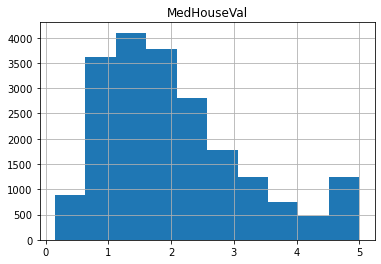

In [19]:
y.hist() 

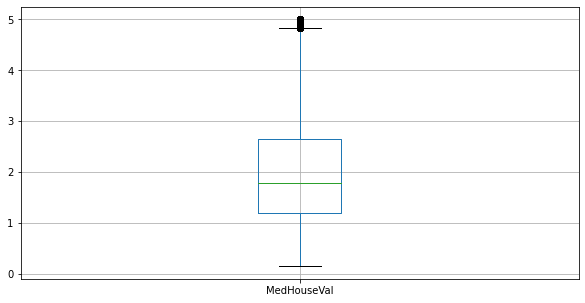

In [20]:
plt.figure(figsize=(10, 5))
y.boxplot(); # после 480 000 $ присутствует "выбросная" часть стоимостей

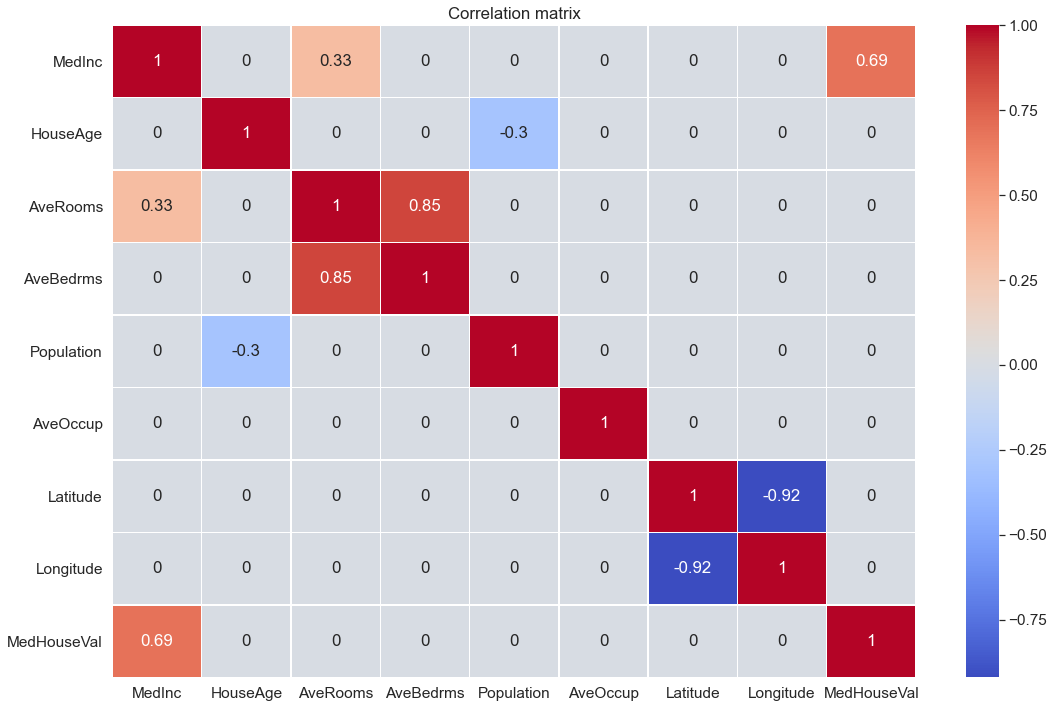

In [50]:
plt.figure(figsize=(18, 12))

sns.set(font_scale=1.4)

corr_matrix = pd.concat([X, y], axis=1).corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # примем всё ниже 0,3 по модулю за незначимую корреляцию

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

По матрице видно, что наибольшая корреляция с целевой переменной у медианного дохода MedInc. Добавлю в модель еще один признак AveRooms.

In [22]:
X2 = X[['MedInc', 'AveRooms']]

In [23]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 1984)

In [24]:
model2 = LinearRegression()

In [25]:
model2.fit(X2_train, y_train)

LinearRegression()

In [26]:
y_pred_train = model2.predict(X2_train)
y_pred_test = model2.predict(X2_test)

In [27]:
metrix_2 = pd.DataFrame({'name': ['rmse_test2', 'rmse_train2', 'r2_test2', 'r2_train2'],\
                        'values': [f' = {mean_squared_error(y_test ,y_pred_test, squared = False)}',\
                                   f' = {mean_squared_error( y_train , y_pred_train,squared = False)}',
                                   f' = {r2_score(y_test, y_pred_test)}',\
                                   f' = {r2_score(y_train, y_pred_train)}']})
metrix_2

,name,values
0,rmse_test2,= 0.835785500706
1,rmse_train2,= 0.8318348184396174
2,r2_test2,= 0.47400807967038716
3,r2_train2,= 0.4806763010121924


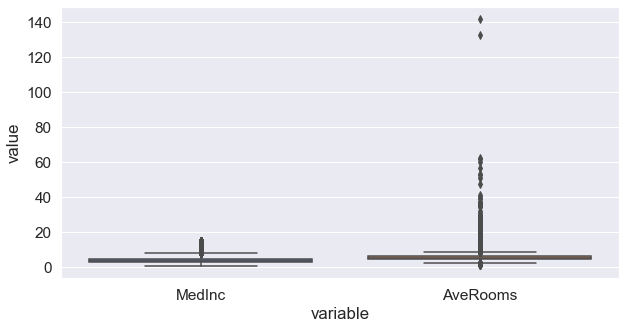

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="variable", y="value", data=pd.melt(X2));

Можем видеть много выбросов AveRooms. Возможно, это ошибка, возможно нет. Большое количество комнат может свидетельствовать о многоквартирном объекте.

In [29]:
df_ = pd.concat([X2, y], axis=1)

In [30]:
Q1 = df_.quantile(q=.25)
Q3 = df_.quantile(q=.75)
IQR = df_.apply(stats.iqr)

In [51]:
# по заданию удаляю выбросы 
# https://www.codecamp.ru/blog/remove-outliers-python/

df_removed = df_[~((df_ < (Q1-1.5*IQR)) | (df_ > (Q3+1.5*IQR))).any(axis=1)]
df_removed

,MedInc,AveRooms,MedHouseVal
2,7.2574,8.288136,3.521
3,5.6431,5.817352,3.413
4,3.8462,6.281853,3.422
5,4.0368,4.761658,2.697
6,3.6591,4.931907,2.992
...,...,...,...
20635,1.5603,5.045455,0.781
20636,2.5568,6.114035,0.771
20637,1.7000,5.205543,0.923
20638,1.8672,5.329513,0.847


In [32]:
X3 = df_removed[['MedInc', 'AveRooms']]
y = df_removed['MedHouseVal']

In [33]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 1984)

In [34]:
model3 = LinearRegression()

In [35]:
model3.fit(X3_train, y_train)

LinearRegression()

In [36]:
y_pred_train = model3.predict(X3_train)
y_pred_test = model3.predict(X3_test)

In [37]:
metrix_3 = pd.DataFrame({'name': ['rmse_test3', 'rmse_train3', 'r2_test3', 'r2_train3'],\
                        'values': [f' = {mean_squared_error(y_test ,y_pred_test, squared = False)}',\
                                   f' = {mean_squared_error( y_train , y_pred_train,squared = False)}',
                                   f' = {r2_score(y_test, y_pred_test)}',\
                                   f' = {r2_score(y_train, y_pred_train)}']})
metrix_3

,name,values
0,rmse_test3,= 0.6898526824391958
1,rmse_train3,= 0.6936656722435226
2,r2_test3,= 0.4497171983649574
3,r2_train3,= 0.4486582827660154


Далее по заданию предложено провести какие-то математические действия с признаками. Прологарифмирую. Предполагаю, что метрики не сильно поменяются от второй модели, веса переменных сохранят свою пропорциональность, даже если значения поменяются. 

In [38]:
df4 = X2.copy()
y = pd.DataFrame(df.target, columns=df.target_names)
df4

,MedInc,AveRooms
0,8.3252,6.984127
1,8.3014,6.238137
2,7.2574,8.288136
3,5.6431,5.817352
4,3.8462,6.281853
...,...,...
20635,1.5603,5.045455
20636,2.5568,6.114035
20637,1.7000,5.205543
20638,1.8672,5.329513


In [39]:
X4 = df4.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

In [40]:
X4

,MedInc,AveRooms
0,0.920395,0.844112
1,0.919151,0.795055
2,0.860781,0.918457
3,0.751518,0.764725
4,0.585032,0.798088
...,...,...
20635,0.193208,0.702900
20636,0.407697,0.786328
20637,0.230449,0.716466
20638,0.271191,0.726688


In [41]:
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size = 0.2, random_state = 1984)

In [42]:
model4 = LinearRegression()

In [43]:
model4.fit(X4_train, y_train)

LinearRegression()

In [44]:
y_pred_train = model4.predict(X4_train)
y_pred_test = model4.predict(X4_test)

In [45]:
metrix_4 = pd.DataFrame({'name': ['rmse_test4', 'rmse_train4', 'r2_test4', 'r2_train4'],\
                        'values': [f' = {mean_squared_error(y_test ,y_pred_test, squared = False)}',\
                                   f' = {mean_squared_error( y_train , y_pred_train,squared = False)}',
                                   f' = {r2_score(y_test, y_pred_test)}',\
                                   f' = {r2_score(y_train, y_pred_train)}']})
metrix_4

,name,values
0,rmse_test4,= 0.8674167590631193
1,rmse_train4,= 0.8560985646109557
2,r2_test4,= 0.43344115349281986
3,r2_train4,= 0.44993819467570595


In [46]:
print(metrix_1)
print('____________________')
print(metrix_2)
print('____________________')
print(metrix_3)
print('____________________')
print(metrix_4)

         name                 values
0   rmse_test   = 0.7291693512266277
1  rmse_train   = 0.7229201191968986
2     r2_test   = 0.5996441124619929
3    r2_train    = 0.607766597651203
____________________
          name                  values
0   rmse_test2        = 0.835785500706
1  rmse_train2    = 0.8318348184396174
2     r2_test2   = 0.47400807967038716
3    r2_train2    = 0.4806763010121924
____________________
          name                 values
0   rmse_test3   = 0.6898526824391958
1  rmse_train3   = 0.6936656722435226
2     r2_test3   = 0.4497171983649574
3    r2_train3   = 0.4486582827660154
____________________
          name                  values
0   rmse_test4    = 0.8674167590631193
1  rmse_train4    = 0.8560985646109557
2     r2_test4   = 0.43344115349281986
3    r2_train4   = 0.44993819467570595


#### Вывод: 

Высокие значения rmse получились у последней модели с прологарифмированными признаками, немного уступает ей вторая модель с двумя признаками.

Не могу понять почему, выглядит так, как будто логарифмирование повысило качество...
Однако, r2 лучше у первой модели. 

Ниже по качеству rmse первая модель с полным набором признаков.

Самая неудачная модель с почищенными "выбросами". Думаю, что этот признак с выбросами надо было преобразовать в категориальный, например, разбить объекты по количеству комнат. Мы, явно, имеем дело с очень разными объектами. 